In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import warnings
from gensim.models import Word2Vec
import pickle

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [33]:
dataset = pd.read_csv("IMDB_dataset_untouched.csv")
reviews = [w for w in dataset["review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]

In [34]:
# Word2vec CBOW model
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [35]:
# Word2vec Skip-Gram model
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [36]:
# 10 most similar words to "movie" - Word2vec CBOW
print(CBOW.wv.most_similar('movie'))

[('film', 0.933101236820221), ('flick', 0.7545943856239319), ('it', 0.6751707196235657), ('show', 0.6453346610069275), ('documentary', 0.6128138899803162), ('movies', 0.6035544276237488), ('sequel', 0.6030428409576416), ('programme', 0.5962323546409607), ('episode', 0.5906891226768494), ('picture', 0.5900669097900391)]


In [37]:
# 10 most similar words to "movie" - Word2vec Skip-Gram
print(Skip_Gram.wv.most_similar('movie'))

[('film', 0.9330013394355774), ('flick', 0.8176965117454529), ('noroi', 0.815165638923645), ('sequal', 0.8101435303688049), ('it', 0.8078417778015137), ('snoozer', 0.8027136325836182), ('thhe', 0.7951573133468628), ('atleast', 0.7942641973495483), ('crapfest', 0.7910455465316772), ('summation', 0.7895165681838989)]


In [38]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec CBOW : ",
CBOW.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec CBOW :  0.93310124


In [39]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec Skip Gram : ",
Skip_Gram.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec Skip Gram :  0.93300146


In [40]:
# word vector for "word" - Word2vec CBOW
CBOW.wv["word"]

array([ 1.9277903 , -0.878658  , -0.51165086, -0.8942909 , -2.195588  ,
       -0.2088796 ,  0.34262192,  2.853515  ,  1.4235018 , -0.30564553,
       -1.2761043 ,  0.28944632,  1.2093183 , -1.2380975 , -0.34799933,
       -0.24058685, -1.7313446 ,  0.11743152,  0.5733594 ,  0.67032033,
       -0.3899487 ,  0.48981553, -0.7973011 ,  3.2176495 , -0.47351402,
       -5.311368  , -0.32458335, -2.534722  ,  0.12993719, -0.4891721 ,
        0.1318335 ,  1.483154  , -1.7188699 , -1.1935647 , -1.3534994 ,
        1.1811466 ,  0.1889669 , -0.25564703,  0.17622262,  0.1117418 ,
        1.7866313 , -0.69035846,  1.3339545 ,  2.070729  , -0.9337437 ,
       -0.10272917, -0.9650869 , -1.0773515 , -2.2854862 ,  0.74760807,
        1.9143106 , -0.3613406 ,  0.01370303,  0.4209205 ,  1.8572593 ,
       -0.49190307, -0.6100221 ,  0.35671118, -0.24145198, -1.2876214 ,
       -1.1082335 , -0.00027171, -1.1833267 , -0.270011  ,  1.9419825 ,
        0.59375024, -3.0340424 ,  1.548274  , -0.30665892, -3.17

In [41]:
# word vector for "word" - Word2vec Skip-Gram
Skip_Gram.wv["word"]

array([-0.19374667, -0.0315141 , -0.15049614,  0.54902947,  0.06013665,
        0.15841775,  0.66596675,  0.65352666, -0.34115517,  0.0977138 ,
        0.13557501, -0.35308644, -0.16618083,  0.02953977,  0.05068462,
       -0.22545253, -0.03216369, -0.18725553,  0.15006967, -0.35731316,
        0.35036293,  0.7838092 ,  0.08644589,  0.12897529, -0.28877228,
       -0.42105258, -0.01890793, -0.6468484 , -0.05045908, -0.14710657,
       -0.24021097,  0.11800133, -0.16337296, -0.5724181 , -0.15551122,
        0.64651203, -0.07623829, -0.10985727, -0.2086976 , -0.10662782,
        0.14896157, -0.41030157,  0.06695285,  0.3424164 , -0.00439921,
        0.14919601,  0.00448985,  0.05788262,  0.21458258, -0.18117005,
        0.13399819, -0.1482743 ,  0.16320625,  0.15516606, -0.03109678,
        0.27336437, -0.06285625,  0.15096995, -0.32069504,  0.03864764,
       -0.07972914,  0.07280941, -0.16067982,  0.08477026, -0.09807511,
        0.43000877, -0.20612068,  0.7048501 , -0.5899088 ,  0.09

In [43]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'movie' - Word2vec " + modelName, pad = 20)
    plt.show()

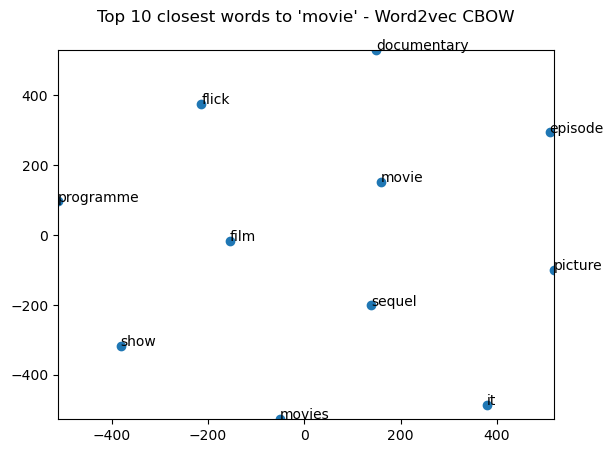

In [44]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'movie', 100)

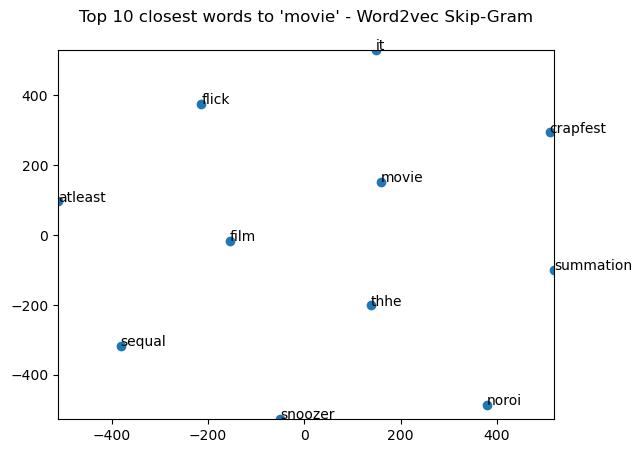

In [45]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'movie', 100)

In [46]:
def getWordVectorCBOW(doc):
    return [CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key]

In [47]:
word_vectors_CBOW = []
for i in range(len(tokenized_words)):
    word_vectors_CBOW.append(getWordVectorCBOW(tokenized_words[i]))

In [48]:
def getWordVectorSkipGram(doc):
    return [Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key]

In [49]:
word_vectors_Skip_Gram = []
for i in range(len(tokenized_words)):
    word_vectors_Skip_Gram.append(getWordVectorSkipGram(tokenized_words[i]))

In [50]:
# saving the vectors to disk
pickle_out = open("word2vec_cbow_vectors_untouched.pickle", "wb")
pickle.dump(word_vectors_CBOW, pickle_out)
pickle_out.close()

In [ ]:
# saving the vectors to disk
pickle_out = open("word2vec_skip-gram_vectors_untouched.pickle", "wb")
pickle.dump(word_vectors_Skip_Gram, pickle_out)
pickle_out.close()